Loading the Data Set IMBD

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it the first time, about 80 MB of data will be downloaded to your machine).

In [26]:
from keras.datasets import imdb

(train_data , train_label) ,(test_data, test_lables) = imdb.load_data(num_words=10000)
# num_words = 1000 means that most accuring 1000 words
# here tokenization is already done in load_data function

Reviews are already pre-processed as we can not train network with string data 

In [27]:
#The variables train_data and test_data are lists of reviews; each review is a 
#list of word indices (encoding a sequence of words).
# train_labels and test_labels are lists of 0s and 1s,
# where 0 stands for negative and 1 stands for positive:
print("Returns the tokinization form of the data\n",train_data[0]) 
print(train_label[0])

Returns the tokinization form of the data
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000:

In [28]:
max([max(sequence) for sequence in train_data])

9999

For just checking we are converting 0 index label back to word

In [29]:
word_index = imdb.get_word_index()
reversed_word_index = dict([(value , key) for (key , value) in word_index.items()])
decoded_review = ' '.join([reversed_word_index.get(i -3 , '?') for i in train_data[0]])


To see the review of first movie

In [30]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

<h1>below is different than one hot encoding 
it is called "BAG OF WORDS"

You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways to do that:

*Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).
*One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.
Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.

we have to convert the numbers into categorical form as above we have convert words into integers not numbers

In [31]:
import numpy as np 
# it is called Bag of Words
# sequence =  50000
# and every sequence is of 10K size
def vectorization_sequences(sequence, dimension=10000):
  results  = np.zeros((len(sequence),dimension))
  for i , sequence in enumerate(sequence):
    results[i,sequence] = 1.
  return results 

#what is actually happing the in the list of vector 
#when we got the word in the sequence it replace it with 1 and others with 0


x_train = vectorization_sequences(train_data)
x_test = vectorization_sequences(test_data)

here what saple lool like

In [32]:
print(x_train[0].shape)
print("lenght of ",len(x_train[0]))

(10000,)
lenght of  10000


Chaninging the type of the labels
<br> we do not have to encode the labels as in binary classification we have only 0 and 1

In [33]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_lables).astype('float32')


In [34]:
y_train[3]

1.0

Building network

In [35]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units = 16 , activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(units = 16 , activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [36]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
              metrics =  ['accuracy'])

<h1>Validation Approch</h1>In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_trian = y_train[10000:]

Training the model

In [38]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
              metrics =  ['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_trian,
                    epochs= 20 ,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5105 - accuracy: 0.7788 - val_loss: 0.3833 - val_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2992 - accuracy: 0.9046 - val_loss: 0.3050 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2222 - accuracy: 0.9265 - val_loss: 0.2804 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1729 - accuracy: 0.9449 - val_loss: 0.2785 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1441 - accuracy: 0.9537 - val_loss: 0.2828 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1194 - accuracy: 0.9635 - val_loss: 0.2940 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0975 - accuracy: 0.9725 - val_loss: 0.3139 - val_accuracy: 0.8827
Epoch 8/20
30

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it:

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side (see figure 3.7), as well as the training and validation accuracy (see figure 3.8). Note that your own results may vary slightly due to a different random initialization of your network.


In [39]:
history_dict = history.history
print("keys\n",history_dict.keys())

print("values\n",history_dict.values())


keys
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
values
 dict_values([[0.5104618668556213, 0.2992006838321686, 0.22218044102191925, 0.17292429506778717, 0.14409232139587402, 0.11936990916728973, 0.0974835529923439, 0.08060764521360397, 0.06887133419513702, 0.05630728229880333, 0.045606035739183426, 0.03500162437558174, 0.03156643733382225, 0.023613858968019485, 0.019977884367108345, 0.015224862843751907, 0.009893127717077732, 0.011679906398057938, 0.005450807046145201, 0.007759039755910635], [0.7788000106811523, 0.9046000242233276, 0.9264666438102722, 0.9448666572570801, 0.9537333250045776, 0.963533341884613, 0.9724666476249695, 0.9783333539962769, 0.9811333417892456, 0.9857333302497864, 0.9883999824523926, 0.993399977684021, 0.9935333132743835, 0.9953333139419556, 0.996399998664856, 0.9979333281517029, 0.9991999864578247, 0.9980000257492065, 0.9997333288192749, 0.9983999729156494], [0.3832557201385498, 0.3049926459789276, 0.2803876996040344, 0.2784724831581116, 0.2827

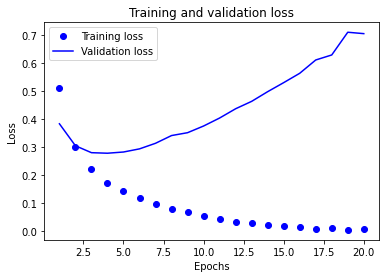

In [40]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


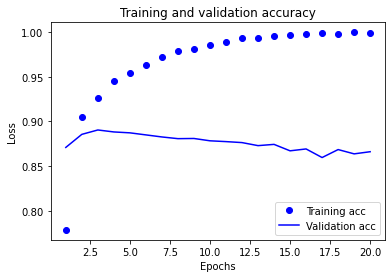

In [41]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)




plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In this case, to prevent overfitting, you could stop training after three epochs. In general, you can use a range of techniques to mitigate overfitting, which we’ll cover in chapter 4.

Let’s train a new network from scratch for four epochs and then evaluate it on the test data.

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h = model.fit(x_train, y_train, epochs=5, batch_size=512,validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 3s 26ms/step - loss: 0.4498 - accuracy: 0.8296 - val_loss: 0.2800 - val_accuracy: 0.9110
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 0.2554 - accuracy: 0.9090 - val_loss: 0.2018 - val_accuracy: 0.9315
Epoch 3/5
49/49 [==============================] - 1s 18ms/step - loss: 0.1992 - accuracy: 0.9291 - val_loss: 0.1526 - val_accuracy: 0.9530
Epoch 4/5
49/49 [==============================] - 1s 18ms/step - loss: 0.1655 - accuracy: 0.9410 - val_loss: 0.1273 - val_accuracy: 0.9611
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3211 - accuracy: 0.8780


In [43]:
history_dict = h.history
print("keys\n",history_dict.keys())

print("values\n",history_dict.values())


keys
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
values
 dict_values([[0.4497692286968231, 0.2554047703742981, 0.19924186170101166, 0.16549310088157654, 0.14136973023414612], [0.8295999765396118, 0.9090399742126465, 0.9290800094604492, 0.9409599900245667, 0.9503200054168701], [0.2800438404083252, 0.2018154412508011, 0.15264977514743805, 0.12725333869457245, 0.1144978478550911], [0.9110000133514404, 0.9315000176429749, 0.953000009059906, 0.9610999822616577, 0.9635999798774719]])


In [44]:
import pandas as pd
p = pd.DataFrame(history_dict)
p

,loss,accuracy,val_loss,val_accuracy
0,0.449769,0.82960,0.280044,0.9110
1,0.255405,0.90904,0.201815,0.9315
2,0.199242,0.92908,0.152650,0.9530
3,0.165493,0.94096,0.127253,0.9611
4,0.141370,0.95032,0.114498,0.9636


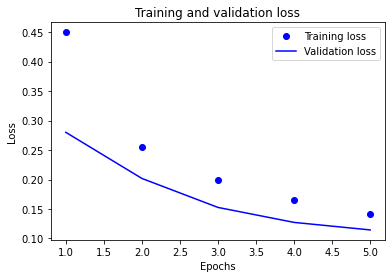

In [45]:
import matplotlib.pyplot as plt

history_dict = h.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [46]:
#model.predict(x_test)
y =np.round(model.predict(x_test))
y

782/782 [==============================] - 1s 2ms/step


array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [55]:
#storing the model
model.save("model2.pkl")

INFO:tensorflow:Assets written to: model2.pkl\assets


<h1>giving the custom data

In [48]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
from keras.models import load_model
m = models.load_model("model2.pkl")

In [74]:
def custome_data(text):
    max= 10000
    tok = Tokenizer(num_words=max)
    tok.fit_on_texts([text])
    s = tok.texts_to_sequences([text])
    x = vectorization_sequences(s,dimension=max)
    p = m.predict(x)
    u = np.round(p)
    if(u == 0):
        print(u)
        print("The Review is Negative")
    else:
        print(",",u)
        print("The Review is Positive")
        



In [78]:
custome_data("bad movie i have ever seen")

1/1 [==============================] - 0s 42ms/step
[[0.]]
The Review is Negative
